In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
import os

In [7]:
# load final sample of 42 agns
objs = [f[:-5] for f in os.listdir(os.path.expanduser("~/research-data/cutout-results/cutout-40x40")) if f[0]=="J"]
# load catalog of 87 agns
catalog = pd.read_csv(os.path.expanduser('~/dualAGN/cutouts/catalog.txt'), names=['name', 'ra', 'dec'], delimiter='\s+')
coords = [SkyCoord(ra=catalog['ra'].loc[i]*u.deg, dec=catalog['dec'].loc[i]*u.deg) for i in range(len(catalog))]
catalog['coords'] = coords
catalog.set_index("name",inplace=True)
# get catalog of 42 agns and ra,dec
cat = catalog.loc[catalog.index.isin(objs)]
#open alpaka catalog
hdul = fits.open(os.path.expanduser("~/alpaka/ALPAKA_v1.fits"))
alpaka = Table(hdul[1].data)
# cross match redshift
ind = [np.where(alpaka['RA'] == cat.iloc[i]['ra'])[0][0] for i in range(42)]
#zs = [alpaka['Z'][ind[j]] for j in range(42)]
cat = alpaka[ind]

In [12]:
print(cat.keys())

['NAME', 'OBJID', 'URL', 'RA', 'DEC', 'Z', 'AGN_TYPE', 'SDSS_HA_NSIG', 'SDSS_HA_EW', 'SDSS_HA_EW_ERR', 'SDSS_HA_CONT', 'SDSS_HA_CENWAV', 'SDSS_HA_CENWAV_ERR', 'SDSS_HA_SIGMA', 'SDSS_HA_SIGMA_ERR', 'SDSS_HA_HEIGHT', 'SDSS_HEIGHT_ERR', 'SDSS_HB_NSIG', 'SDSS_HB_EW', 'SDSS_HB_EWERR', 'SDSS_HB_CONT', 'SDSS_HB_CENWAV', 'SDSS_HB_CENWAVERR', 'SDSS_HB_SIGMA', 'SDSS_HB_SIGMAERR', 'SDSS_HB_HEIGHT', 'SDSS_HB_HEIGHTERR', 'SDSS_OIII_NSIG', 'SDSS_OIII_EW', 'SDSS_OIII_EWERR', 'SDSS_OIII_CONT', 'SDSS_OIII_CENWAV', 'SDSS_OIII_CENWAVERR', 'SDSS_OIII_SIGMA', 'SDSS_OIII_SIGMAERR', 'SDSS_OIII_HEIGHT', 'SDSS_OIII_HEIGHTERR', 'SDSS_NII_NSIG', 'SDSS_NII_EW', 'SDSS_NII_EWERR', 'SDSS_NII_CONT', 'SDSS_NII_CENWAV', 'SDSS_NII_CENWAVERR', 'SDSS_NII_SIGMA', 'SDSS_NII_SIGMAERR', 'SDSS_NII_HEIGHT', 'SDSS_NII_HEIGHTERR', 'HB_WAV', 'HB_NORM', 'HB_NORM_ERR', 'HB_FWHM', 'HB_FWHM_ERR', 'HB_VEL', 'HB_VEL_ERR', 'HB_FLUX', 'HB_FLUX_ERR', 'HB_LUM', 'HB_LUM_ERR', 'HBB_WAV', 'HBB_NORM', 'HBB_NORM_ERR', 'HBB_FWHM', 'HBB_FWHM_ERR',

Text(0, 0.5, 'number of agn')

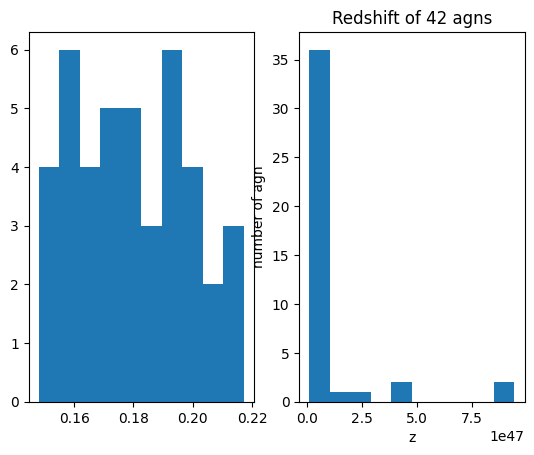

In [14]:
fig,ax = plt.subplots(1,2)
ax[0].hist(cat['Z'])
ax[1].hist(cat['OIII_5007_LUM_DERRED']*600.)
plt.title("Redshift of 42 agns")
plt.xlabel("z")
plt.ylabel("number of agn")

In [3]:
hdul = fits.open(os.path.expanduser("~/raw-data-agn/mos-fits-agn/2020-02-21_J_J0901+1815_c1-4_58900_12932.mos.fits"))
hdul[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 4698 / Axis length                                    
NAXIS2  =                 4708 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2020-10-23T22:03:42' / Date FITS file was generated                  
IRAF-TLM= '2020-10-23T22:03:32' / Time of last modification                     
OBJECT  = 'J0901+1815'         / Name of the object observed                    
EQUINOX =        2000.00000000 / Mean equinox                                   
MJD-OBS =   5.890100000000E+04 / Modified Julian date at start                  
RADESYS = 'ICRS    '        